In [1667]:
# Setup environment
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

In [1668]:
# Ingest raw customer data
raw_data = pd.read_csv('dat/online_shoppers_intention.csv.gz')

In [1669]:
display(raw_data.head(20))

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


### Task 1: Classification

1.1 Explore Raw Data (General EDA)

In [1670]:
# Check for Non-Null counts and column data types
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [1671]:
# Evaluate numerical columns
raw_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [1672]:
# Chech distribution of Revenue columns
print(f"{round(raw_data.Revenue.mean() * 100, 2)}%")

15.47%


In [1673]:
# Check % of purchases from special day rows
special_day_rows = raw_data[raw_data.SpecialDay == 1]
print(special_day_rows.Revenue.value_counts())
print(f"{round(special_day_rows.Revenue.mean() * 100, 2)}%")

False    144
True      10
Name: Revenue, dtype: int64
6.49%


In [1674]:
# Check % of purchases from weekend shoppers
weekend_rows= raw_data[raw_data.Weekend == True]
print(weekend_rows.Revenue.value_counts())
print(f"{round(weekend_rows.Revenue.mean() * 100, 2)}%")

False    2369
True      499
Name: Revenue, dtype: int64
17.4%


In [1675]:
raw_data.Month.value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [1676]:
# Convert Month column to numerical representations of the Months rather than string abbreviations
month_mapping = {
    'May': 5,
    'Nov': 11,
    'Mar': 3,
    'Dec': 12,
    'Oct': 10,
    'Sep': 9,
    'Aug': 8,
    'Jul': 7,
    'June': 6,
    'Feb': 2
}

raw_data['Month'] = raw_data.Month.map(month_mapping)

In [1677]:
# Confirm numerical month mapping
raw_data.Month.value_counts()

5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month, dtype: int64

In [1678]:
# Understand Categorical column values
print('Operating Systems:', raw_data.OperatingSystems.unique())
print('Browser:', raw_data.Browser.unique())
print('Region:', raw_data.Region.unique())
print('Traffic Type:', raw_data.TrafficType.unique())
print('Visitor Type:', raw_data.VisitorType.unique())

Operating Systems: [1 2 4 3 7 6 8 5]
Browser: [ 1  2  3  4  5  6  7 10  8  9 12 13 11]
Region: [1 9 2 3 4 5 6 7 8]
Traffic Type: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]
Visitor Type: ['Returning_Visitor' 'New_Visitor' 'Other']


In [1679]:
raw_data.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [1680]:
# Breakdown Visitor type and % revenue from each
print("Visitor Type % Revenue:")
print(f"    Returning: {round(raw_data[raw_data.VisitorType == 'Returning_Visitor']['Revenue'].mean() * 100, 2)}%")
print(f"    New: {round(raw_data[raw_data.VisitorType == 'New_Visitor']['Revenue'].mean() * 100, 2)}%")
print(f"    Other: {round(raw_data[raw_data.VisitorType == 'Other']['Revenue'].mean() * 100, 2)}%")

Visitor Type % Revenue:
    Returning: 13.93%
    New: 24.91%
    Other: 18.82%


In [1681]:
# Convert Visitor Type to numerical column for correlation and modeling purposes
visitor_type_mapping = {'Returning_Visitor': 0, 'New_Visitor': 1, 'Other': 2}
raw_data['VisitorType'] = raw_data.VisitorType.map(visitor_type_mapping)

1.2 Advanced EDA

<AxesSubplot:>

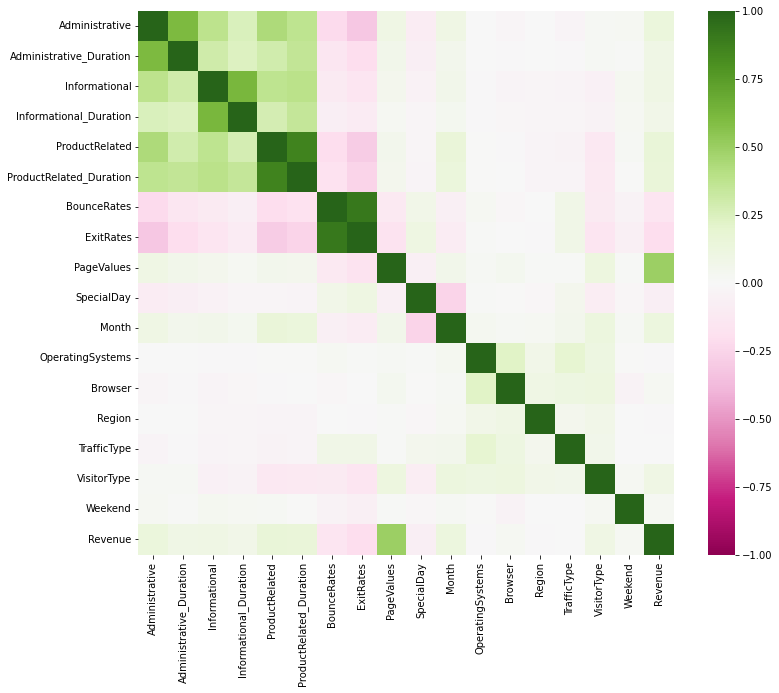

In [1682]:
# Check for multi-collinearity amongst independent variables (features)
plt.figure(figsize=(12, 10))
cor = raw_data.corr()
sns.heatmap(cor, vmin=-1, vmax=1, cmap="PiYG")

In [1683]:
# Explore correlation related to Bounce Rate and Exit Rate
display(raw_data[(raw_data.BounceRates == .2) & (raw_data.ExitRates != .2)])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


In [1684]:
# Drop BounceRate since Exit Rate effectively covers this statistic and gives more coverage to what the customer did during the session
#clean_data = raw_data.drop('ExitRates', axis=1)
clean_data = raw_data.copy(deep=True)

# Drop page count columns as duration will serve as a better indicator of customer interaction on website
clean_data['Total_Duration'] = clean_data.apply(
    lambda x: x.Administrative_Duration + x.Informational_Duration + x.ProductRelated_Duration, axis=1
)
#clean_data = clean_data.drop(['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'], axis=1)

In [1685]:
# Explore PageValues data leakage potential
print('Zero/No PageValue:')
print(f"No Revenue Count: {raw_data[(raw_data.PageValues == 0) & (raw_data.Revenue == 0)]['Revenue'].count()}")
print(f"No Revenue Count: {raw_data[(raw_data.PageValues == 0) & (raw_data.Revenue == 1)]['Revenue'].count()}")

print()

print('Positive PageValue:')
print(f"No Revenue Count: {raw_data[(raw_data.PageValues > 0) & (raw_data.Revenue == 0)]['Revenue'].count()}")
print(f"Revenue Count: {raw_data[(raw_data.PageValues > 0) & (raw_data.Revenue == 1)]['Revenue'].count()}")

Zero/No PageValue:
No Revenue Count: 9230
No Revenue Count: 370

Positive PageValue:
No Revenue Count: 1192
Revenue Count: 1538


In [1686]:
#clean_data = clean_data.drop('PageValues', axis=1)

In [1687]:
display(clean_data)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,0,False,False,0.000000
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,0,False,False,64.000000
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,0,False,False,0.000000
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,0,False,False,2.666667
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,0,True,False,627.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,0,True,False,1928.791667
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,0,True,False,465.750000
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,0,True,False,184.250000
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,0,False,False,421.000000


Note:
- BounceRates was dropped from the df since it was highly correlated to ExitRates and ExitRates covers BounceRates "no other page visits" after 1 page attribute which is really what I care about with BounceRate (i.e. customers that visited the website then left with no other pages visited)
    - i.e. when BounceRate == .2 then ExitRate always equals .2
- Columns relating to page durations were dropped as well since they were slightly-highly correlated to their respective count columns.
    - Counts will cover the page splits when looking at whcih page was visited in further analysis and any durations that all be included in an all in one column "Total_Duration"
- In addition Page Value covers the avg. page value for a customer BEFORE completing a transaction, therefore this can lead to data leakage in the model and for that reason the column was taken out.
    - Also, I don't care about page value, I really only care if someone purchases something or not (for this scenario)

1.3 Train/Test Split

In [1688]:
# Create train and test df's
train_df = clean_data[clean_data.Month > 5]
test_df = clean_data[clean_data.Month < 4]

In [1689]:
# Print shapes of both df's
print(train_df.shape)
print(test_df.shape)

(6875, 19)
(2091, 19)


In [1690]:
# Chech distribution of Revenue columns in training dataset and test dataset
print(f"Training: {round(train_df.Revenue.mean() * 100, 2)}%")
print(f"Training Count: {train_df[train_df.Revenue == True]['Revenue'].count()}")
print(f"Test: {round(test_df.Revenue.mean() * 100, 2)}%")

Training: 19.61%
Training Count: 1348
Test: 9.33%


In [1691]:
# Undersample non-revenue rows to counter data imbalance for revenue rows
non_rev_rows = clean_data[(clean_data.Month > 5) & (clean_data.Revenue == 0)].sample(n=1348)
rev_rows = clean_data[(clean_data.Month > 5) & (clean_data.Revenue == 1)]
train_df = pd.concat((non_rev_rows,rev_rows))

In [1692]:
# Check shape and % Revenue to make sure training set is balanced
print(train_df.shape)
print(train_df.Revenue.mean())

(2696, 19)
0.5


In [1693]:
# Check if data is stratified for 
print('Operating Systems:', set(test_df.OperatingSystems.unique()).difference(set(train_df.OperatingSystems.unique())))
print('Browser:', set(test_df.Browser.unique()).difference(set(train_df.Browser.unique())))
print('Region:', set(test_df.Region.unique()).difference(train_df.Region.unique()))
print('Traffic Type:', set(test_df.TrafficType.unique()).difference(train_df.TrafficType.unique()))
print('Visitor Type:', set(test_df.VisitorType.unique()).difference(train_df.VisitorType.unique()))

Operating Systems: set()
Browser: {9}
Region: set()
Traffic Type: {9, 12, 14}
Visitor Type: set()


1.4 Feature Selection

In [1694]:
features = ['BounceRates', 'VisitorType', 'PageValues', 'TrafficType']

In [1695]:
X_train = train_df[features]
y_train = train_df.pop('Revenue')

X_test = test_df[features]
y_test = test_df.pop('Revenue')

1.5 Model Fitting

In [1696]:
# Instantiate Model and Pipeline
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced'))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('lr', LogisticRegression(class_weight='balanced'))])

1.6 Performance

In [1697]:
# Predict and score model
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.98      0.96      0.97      1896
        True       0.67      0.86      0.75       195

    accuracy                           0.95      2091
   macro avg       0.83      0.91      0.86      2091
weighted avg       0.96      0.95      0.95      2091

